<a href="https://colab.research.google.com/github/HaMqwerty/marioAI/blob/main/Mario_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install Pyglet
!pip install --upgrade opencv-python
!pip install gym_super_mario_bros==7.4.0 nes-py
!pip install gymnasium git+https://github.com/HaMqwerty/Gymnasium@nomoretruncated
!pip install torch torchvision torchaudio -f https://download.pytorch.org/whl/cu113/torch_stable.html
!pip install stable-baselines3 git+https://github.com/HaMqwerty/stable-baselines3@removed_truncated
!pip install shimmy
!pip install -Uqq ipdb


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.8/876.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 7.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.8.0.76
    Uninstalling opencv-python-4.8.0.76:
      Successfully uninstalled opencv-python-4.8.0.76
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.7/77.7 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.0 MB/s eta 0:00:00
  Created wheel for nes-py: filename=nes_py-8.2.1-cp310-cp310-linux_x86_64.whl size=535720 sha256=124608ba00963df901bc5003b4d305be2a5192ffc55d31ca09cb05bcaf721e52
  Stored in directory: /root/.cache/pip/wheels/34/a7/d5/9aa14b15df740a53d41f702e4c795731b6c4da7925deb8476c
Successfully built nes-py
  Attempting uninstall: pyglet
    Found existing installation: pyglet

In [2]:
#!pip install --upgrade gym

In [3]:
import gym
import pyglet
import gym_super_mario_bros
from nes_py.wrappers import JoypadSpace
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT
from matplotlib import pyplot as plt
import os
from IPython.display import clear_output, display
from PIL import Image
import numpy as np
import pyglet
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import BaseCallback
import ipdb
import pdb

In [4]:
!export DISPLAY=:0

JoypadSpace.reset = lambda self, **kwargs: self.env.reset(**kwargs)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

# done, truncated = True, True
# for step in range(100000):
#     if done: # or truncated
#         env.reset()

#     state, reward, done, info = env.step(env.action_space.sample())

#     # OR for those who made the switch to gymnasium
#     # state, reward, done, truncated, info = env.step(env.action_space.sample())

#     # Grab image from env as array
#     img = env.render(mode='rgb_array')

#     # Display image with IPython; clear last iPython display on create
#     display(Image.fromarray(np.array(img), 'RGB'), clear=True)

# env.close()

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment SuperMarioBros-v0 is out of date. You should consider upgrading to version `v3`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [6]:
# 1. Create the base environment
#env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# 2. Simplify the controls
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# 3. Grayscale
# env = GrayScaleObservation(env, keep_dim=True)
# # 4. Wrap inside the Dummy Environment
# env = DummyVecEnv([lambda: env])
# # 5. Stack the frames
# env = VecFrameStack(env, 4, channels_order='last')

In [7]:
# JoypadSpace.reset = lambda self, **kwargs: self.env.reset(**kwargs)

In [8]:
# from nes_py import NESEnv
# _reset = NESEnv.reset

# def reset(*args, **kwargs):
#     obs_info = _reset(*args, **kwargs)
#     obs, info = obs_info if type(obs_info) == tuple else (obs_info, {})
#     return obs, info

# NESEnv.reset = reset

In [9]:

print(pyglet.version)

state = env.reset()

1.5.21


In [10]:
#help(JoypadSpace.step)
help(env.step)

Help on method step in module nes_py.wrappers.joypad_space:

step(action) method of nes_py.wrappers.joypad_space.JoypadSpace instance
    Take a step using the given action.
    
    Args:
        action (int): the discrete action to perform
    
    Returns:
        a tuple of:
        - (numpy.ndarray) the state as a result of the action
        - (float) the reward achieved by taking the action
        - (bool) a flag denoting whether the episode has ended
        - (dict) a dictionary of extra information



In [11]:
observation, reward, terminated, info = env.step(env.action_space.sample())

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):


state, reward, done, info = env.step([5])

In [12]:
print(state.ndim)

3


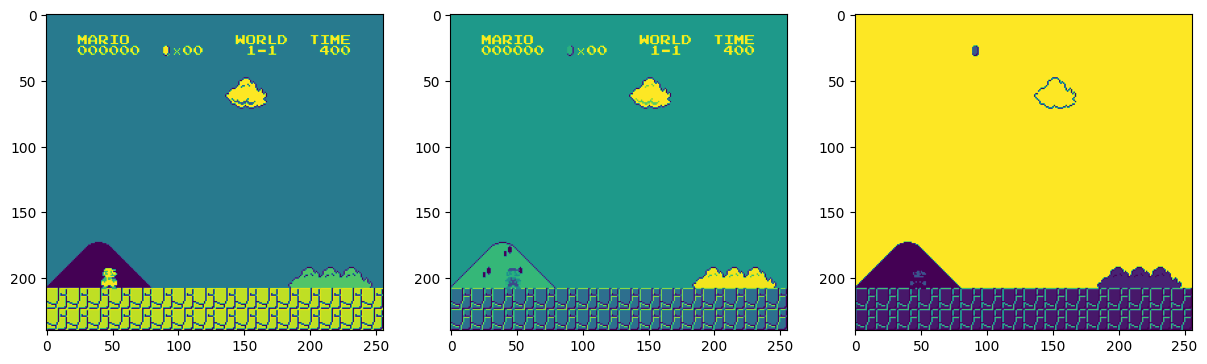

In [13]:
plt.figure(figsize=(20,16))
for idx in range(state.shape[2]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0:,:,idx])
plt.show()

In [14]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [15]:
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

In [16]:
callback = TrainAndLoggingCallback(check_freq=1000, save_path=CHECKPOINT_DIR)

In [17]:
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, n_steps=512)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [18]:
model.learn(total_timesteps=1, callback=callback)

Logging to ./logs/PPO_1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


----------------------------
| time/              |     |
|    fps             | 25  |
|    iterations      | 1   |
|    time_elapsed    | 20  |
|    total_timesteps | 512 |
----------------------------


In [19]:
model.save('thisisatestmodel')

In [20]:
# # model = PPO.load('./train/best_model_1000')
# import sys
# newer_python_version = sys.version_info.major == 3 and sys.version_info.minor >= 8

# custom_objects = {}
# if newer_python_version:
#     custom_objects = {
#         "learning_rate": 0.0,
#         "lr_schedule": lambda _: 0.0,
#         "clip_range": lambda _: 0.0,
#     }

model = PPO.load('thisisatestmodel')

In [21]:
state = env.reset()
print(env.action_space)

Discrete(7)


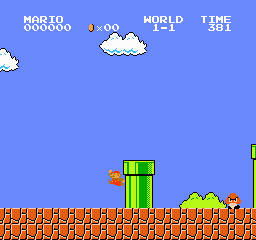

KeyboardInterrupt: 

In [22]:



state = env.reset()
# Loop through the game
while True:
    action, foo = model.predict(state.copy())
    int_action = int(action.astype(int))
    print(action, foo)
    state, reward, done, info = env.step(int_action)
    # Grab image from env as array
    img = env.render(mode='rgb_array')

    # Display image with IPython; clear last iPython display on create
    display(Image.fromarray(np.array(img), 'RGB'), clear=True)

In [23]:
pip freeze

absl-py==1.4.0
aiohttp==3.9.3
aiosignal==1.3.1
alabaster==0.7.16
albumentations==1.3.1
altair==4.2.2
annotated-types==0.6.0
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array-record==0.5.0
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.0
attrs==23.2.0
audioread==3.0.1
autograd==1.6.2
Babel==2.14.0
backcall==0.2.0
beautifulsoup4==4.12.3
bidict==0.23.1
bigframes==0.22.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.4
bqplot==0.12.43
branca==0.7.1
build==1.1.1
CacheControl==0.14.0
cachetools==5.3.3
catalogue==2.0.10
certifi==2024.2.2
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.85
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpathlib==0.16.0
cloudpickle==2.2.1
cmake==3.27.9
cmdstanpy==1.2.1
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.4
cons==0.4.6
contextlib2==21.6.0
contourpy==1.2.0
cryptography==42.0.5
cufflinks==0.17.3
cupy-cuda12x==12.2.0
